<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/Gradient_boost_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Generating Dataset

In [2]:
np.random.seed(42)
X = np.random.rand(100,1)-0.5
y = 3*X[:,0]**2 + 0.5 * np.random.randn(100)

In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

In [6]:
df

,X,y
0,-0.125460,0.090744
1,0.450714,0.459926
2,0.231994,0.207344
3,0.098658,-0.964584
4,-0.343981,0.245134
...,...,...
95,-0.006204,-0.407790
96,0.022733,-0.037001
97,-0.072459,0.186327
98,-0.474581,0.814026


Text(0.5, 1.0, 'X vs Y')

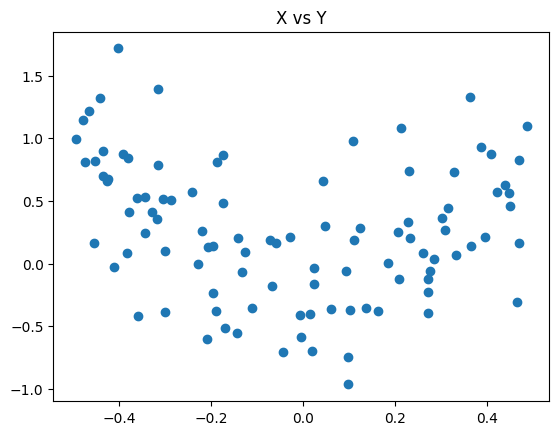

In [7]:
plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

#Here calculating for the model 1.

In [8]:
df['pred1'] = df['y'].mean()

In [9]:
df

,X,y,pred1
0,-0.125460,0.090744,0.264972
1,0.450714,0.459926,0.264972
2,0.231994,0.207344,0.264972
3,0.098658,-0.964584,0.264972
4,-0.343981,0.245134,0.264972
...,...,...,...
95,-0.006204,-0.407790,0.264972
96,0.022733,-0.037001,0.264972
97,-0.072459,0.186327,0.264972
98,-0.474581,0.814026,0.264972


#Now calcuating the recidual for the 1st model.